# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

### Exploración y limpieza de datos


In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/raw/medical_insurance_cost.csv', sep = ',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Obtener las dimensiones.
data.shape

(1338, 7)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como podemos obserbar, el data set no cuenta con valores nulos.

#### Eliminar duplicados

In [6]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(1)

Nos encontramos con que hay 1 fila duplicada y pasamos a eliminarla para convertir el data set en un data set sin duplicados

In [7]:
# Eliminar duplicados. 

data_sin_duplicados = data.drop_duplicates(subset = data.columns)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Eliminar columnas sin relevancia

In [8]:
# #Eliminar columnas.

# data_limpia = data_sin_duplicados.drop(['month', 'day_of_week'], axis = 1, inplace = False)
# data_limpia.head()

data_limpia = data_sin_duplicados
data_limpia.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Tambien eliminamos las columnas que consideramos que no tienen relacion con el problema. En este caso en particular no encontramos columnas sin relación. 

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

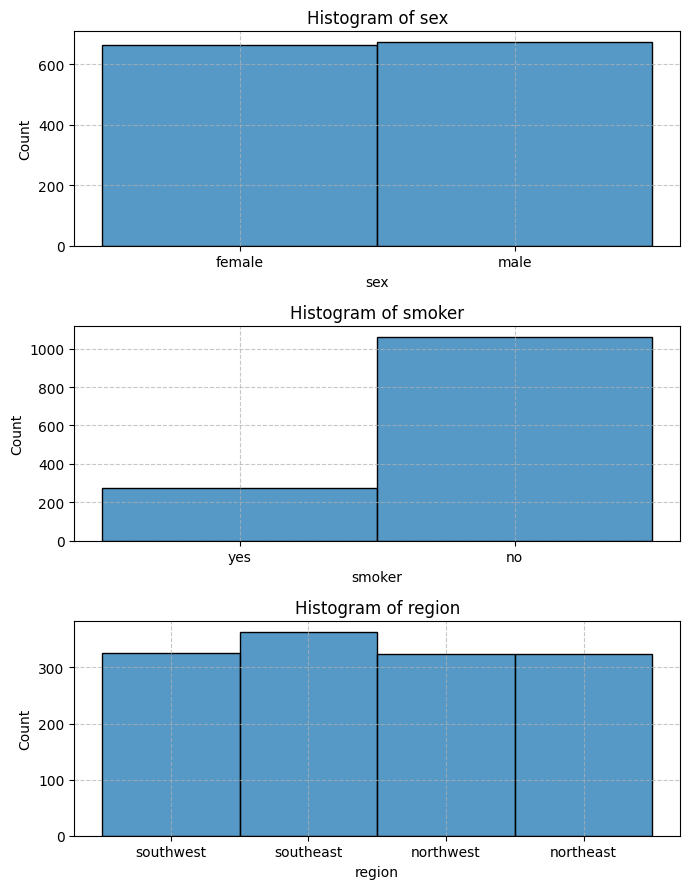

In [9]:
categoricals_variables = ['sex', 'smoker', 'region']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

**Análisis de las variables categoricas**

- **Sex**: Hay practicamente el mismo numero de mujeres que de hombres en el data set.
- **Smoker**: De esas personas la gran mayoria no son fumadores.(Menos de 300 personas son fumadoras, contra mas de 1000 que no lo son).
- **Region**: el data set esta dividido en 4 regiones y las personas del data set en cada uno de ellos cuatro de manera practicamnte equitativa. (Casi el mismo numero de personas en cada region). 


#### Análisis sobre variables numéricas

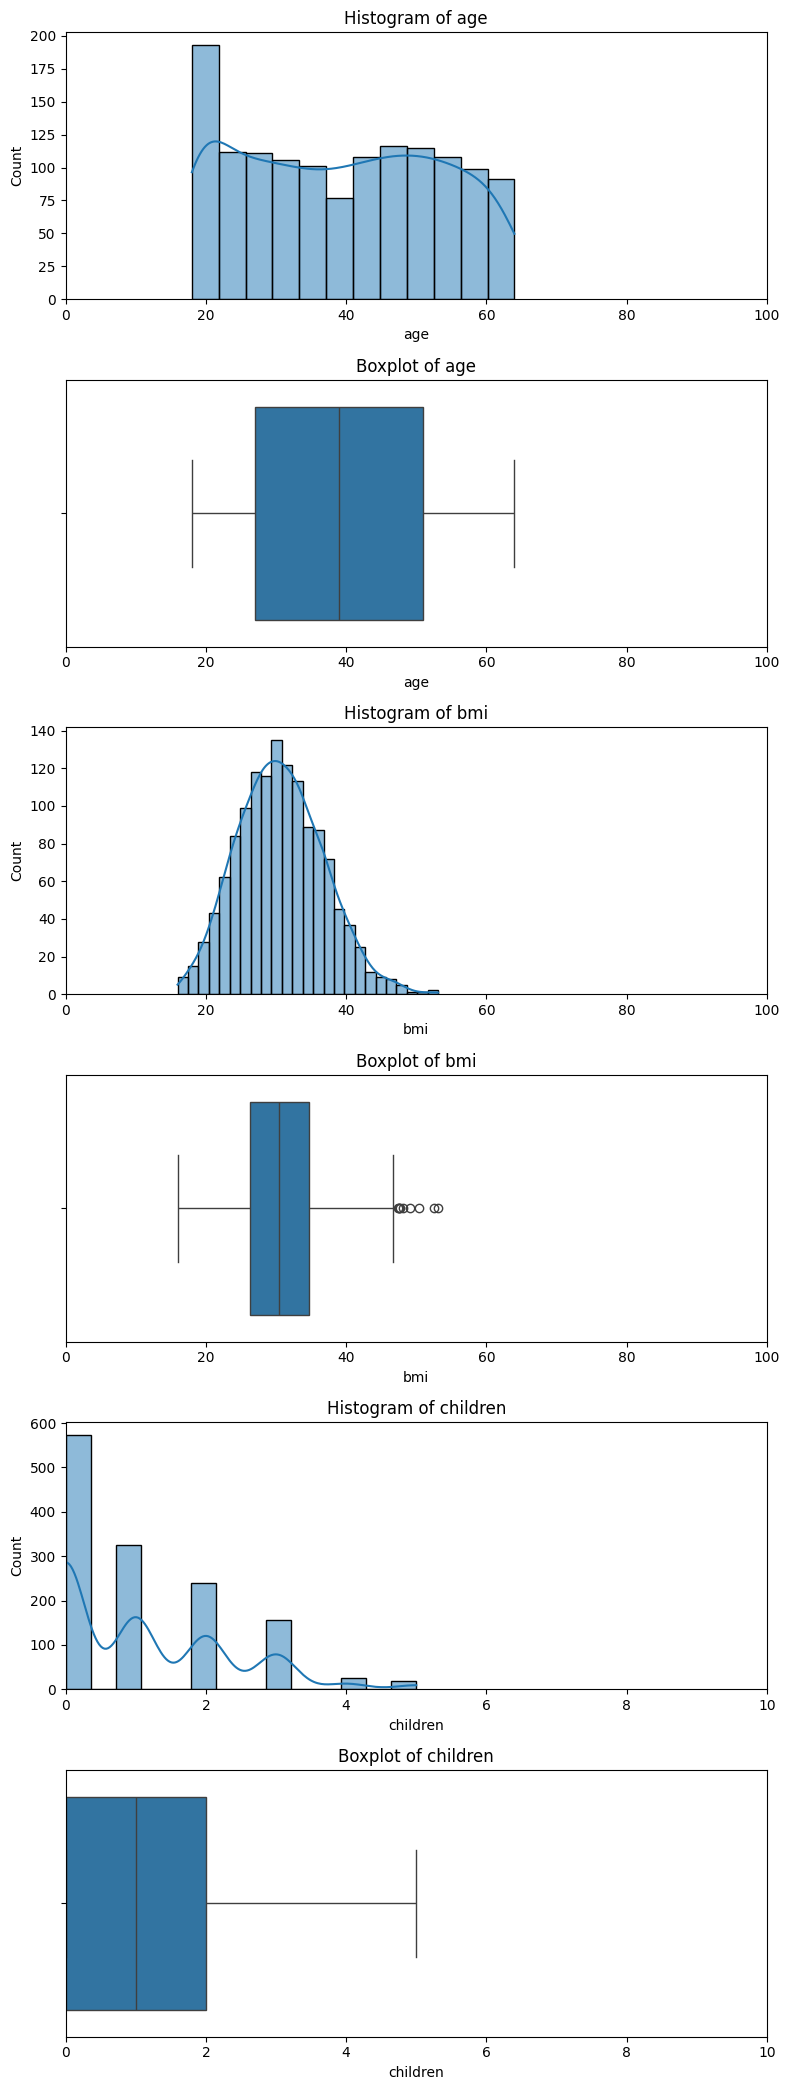

In [12]:
numericals_variables = ['age', 'bmi', 'children']

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'bmi': (0, 100),    
        'children': (0, 10), 
        
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

**Análisis de las variables numéricas**

- **Age**: La media de edad son los 40 años. y las edades van de los 20 a los 65 años. 
- **BMI**: El indice de masa corporar contiene valores entre los 15 y los 55 puntos, estando la media de puntos en los 30 y dejandonos ver algunos valores outliers por encima del limite superior. 
- **Children**: Con una media de 1 hijo, desde sin hijos hasta 5 hijos conforman esta variable. 


### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

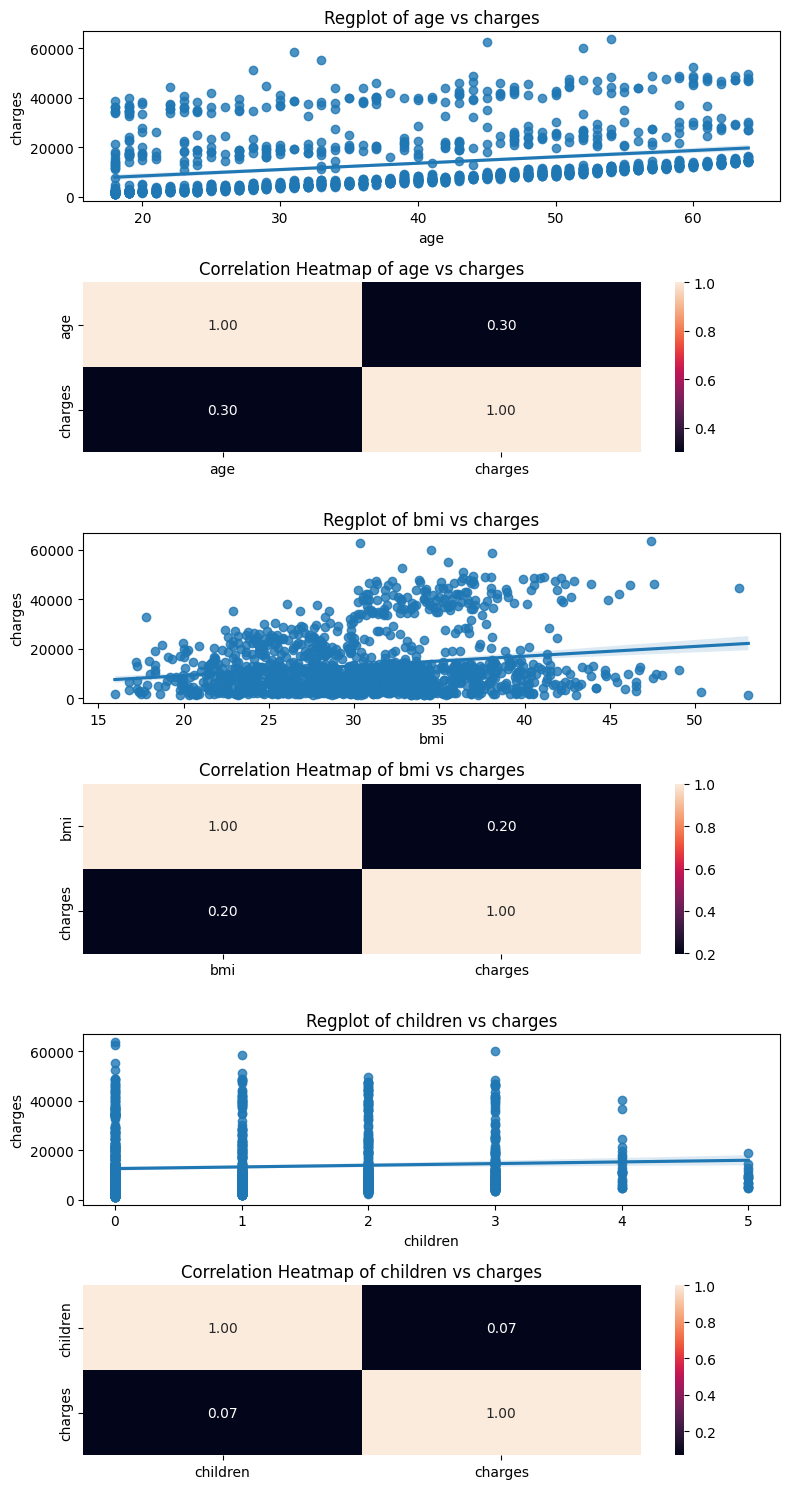

In [13]:
numericals_variables = ['age', 'bmi', 'children']
  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'charges' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

**Análisis numerico-numerico**

- **age vs charges**: Podemos observar una relacion directa entre la edad y el precio del seguro. (A medida que la edad aumenta el precio tambien lo hace).
- **BMI vs charges**: Al igual que con la edad pero con una relacion mas debil, podemos observar como aumenta el precio a medida que bmi es mayor. 
- **children vs charges**: La relacion entre la cantidad de hijos y el precio del seguro es mucho mas debil que las anteriores pero existe. 

**Análisis de posibles relaciones entre variables numericas**

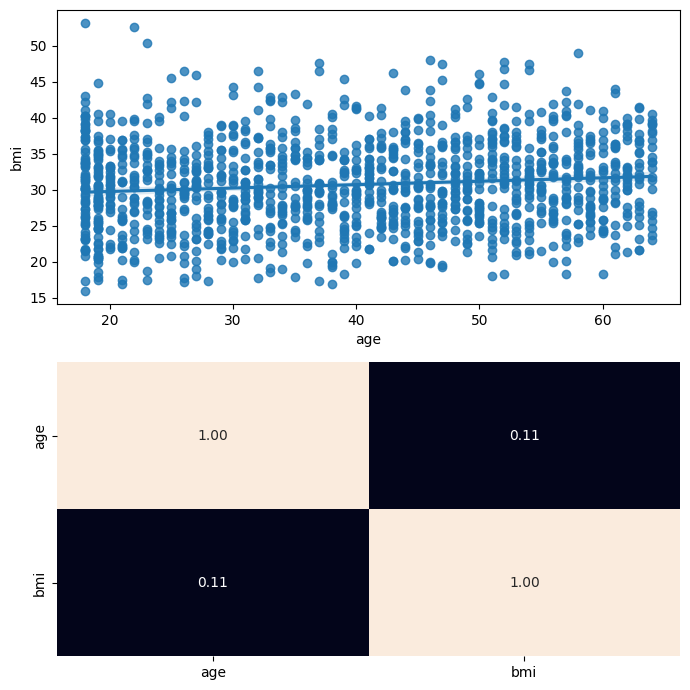

In [26]:
# Crear un diagrama de dispersión múltiple

fig, axis = plt.subplots(2, 1, figsize = (7, 7))  

sns.regplot(data = data_limpia, x = "age", y = "bmi", ax = axis[0])
sns.heatmap(data_limpia[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()

Como podemos observar, existe una relación, aunque es una relación débil entre la edad de la persona y su bmi. (en algunos casos la tendencia es que a mas mayor la persona mayor tambien su bmi).

#### Análisis categórico-categórico

En este caso en particular, y al tratarse de un data set con target numerico, no haremos analisis entre las variables catergoricas.

##### Combinaciones de la clase con varias predictoras

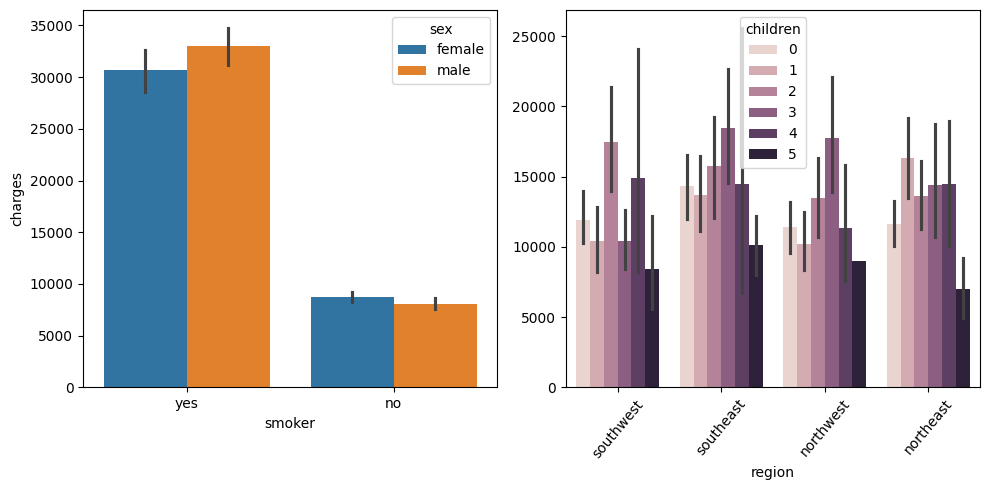

In [34]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpia, x = "smoker", y = 'charges', hue = 'sex')

sns.barplot(ax = axis[1], data = data_limpia, x = "region", y = 'charges', hue = 'children').set(ylabel = None)

# Ajustar etiquetas en el eje x
x_ticks = axis[1].get_xticklabels()

if len(x_ticks) > 20:
    # Si hay más de 20 etiquetas, eliminar las etiquetas
    axis[1].set_xticklabels([])
else:
    # Si hay entre 10 y 20 etiquetas, rotarlas
    for tick in x_ticks:
        tick.set_rotation(50)

plt.tight_layout()
plt.show()

Noik observamos relaciones directas en los anteriores gráficos.

##### Análisis de correlaciones. 

In [38]:
# Análisis de correlaciones.

categoricals_variables = ['sex', 'smoker', 'region']

# Factorización.

data_limpia["sex_n"] = pd.factorize(data_limpia["sex"])[0]

data_limpia["smoker_n"] = pd.factorize(data_limpia["smoker"])[0]

data_limpia["region_n"] = pd.factorize(data_limpia["region"])[0]


# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

sex_transformation_rules = {row["sex"]: row["sex_n"] for _, row in data_limpia[["sex", "sex_n"]].drop_duplicates().iterrows()}

smoker_transformation_rules = {row["smoker"]: row["smoker_n"] for _, row in data_limpia[["smoker", "smoker_n"]].drop_duplicates().iterrows()}

region_transformation_rules = {row["region"]: row["region_n"] for _, row in data_limpia[["region", "region_n"]].drop_duplicates().iterrows()}


# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "sex": sex_transformation_rules,
    "smoker": smoker_transformation_rules,
    "region": region_transformation_rules,
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)

data_limpia.head()

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_2844/85572045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia["sex_n"] = pd.factorize(data_limpia["sex"])[0]
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_2844/85572045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia["smoker_n"] = pd.factorize(data_limpia["smoker"])[0]
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_2844/85572045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a 

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


#### Análisis de correlaciones numérico-categórico (completo)

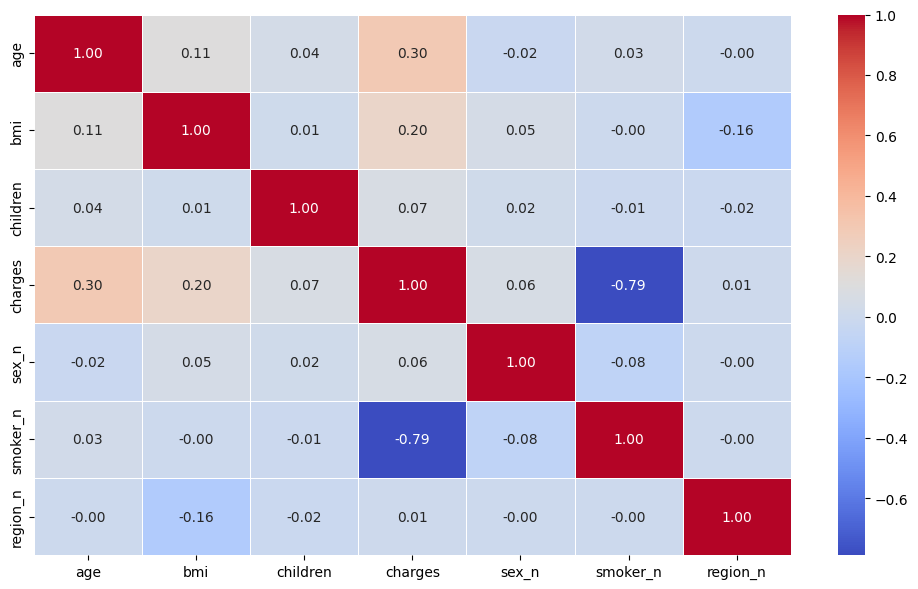

In [40]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

Podemos observar relacion directa entre variasde las variables, como pueden ser el bmi y la edad vs el target. no son unas relaciones muy fuertes, pero existen. Pero el punto a tener mas encuenta es la relacion negativa tan fuerte que podemos observar entre los fumadores y el target, sinedo una relacion muy fuerte y dando a entender que el precio varia mucho en funcion de si eres o no fumador. 

Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

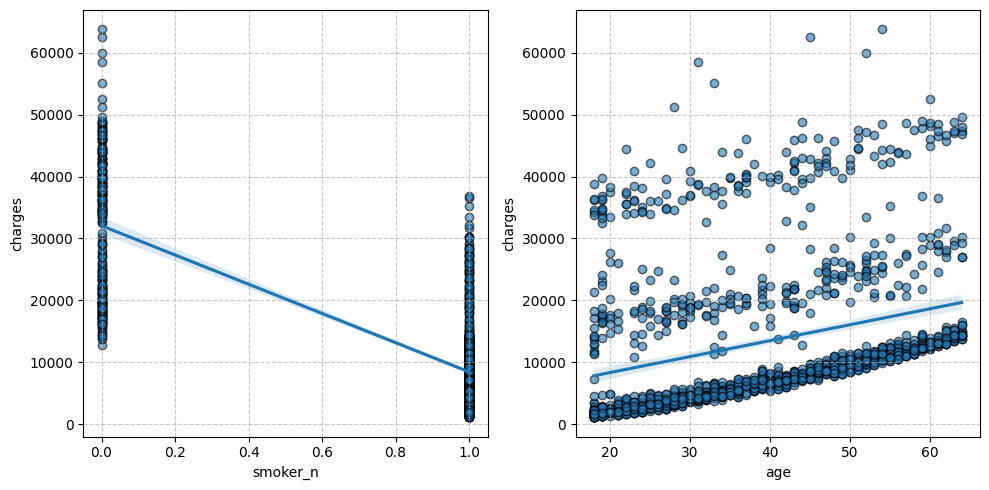

In [41]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "smoker_n", y = "charges", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "age", y = "charges", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Como comentabamos en el punto anterior, corroboramios la fuerte relacion entre la columna smokers y charges. (El precio sube si eres fumador).

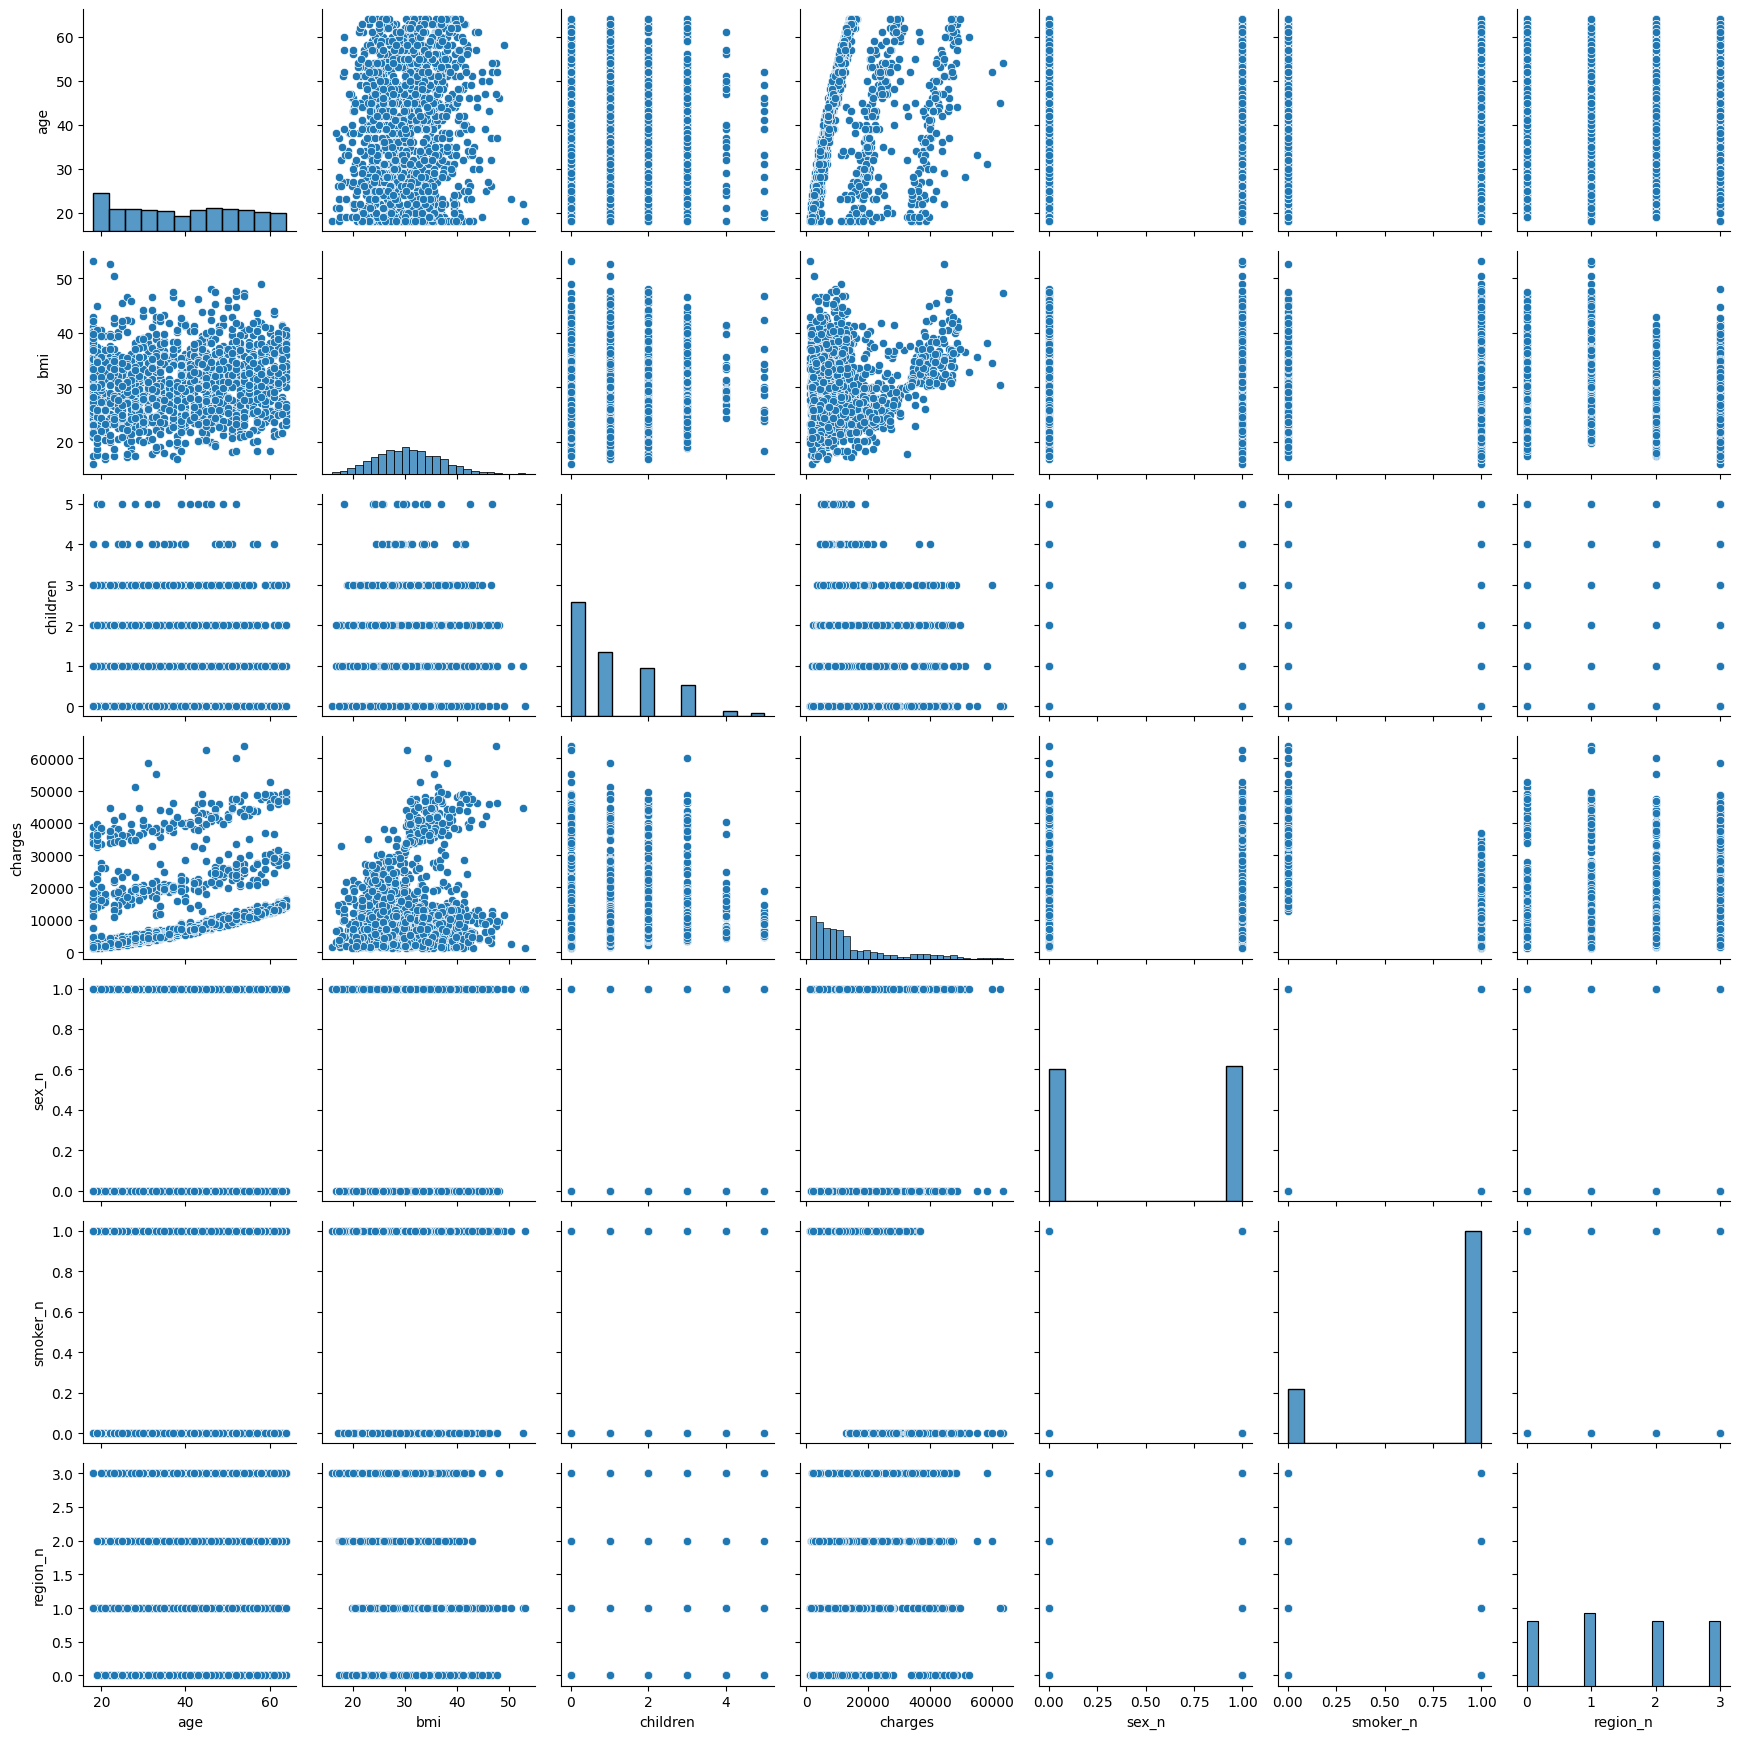

In [42]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [43]:
data_limpia.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


#### Boxplots para visualizar los outliers

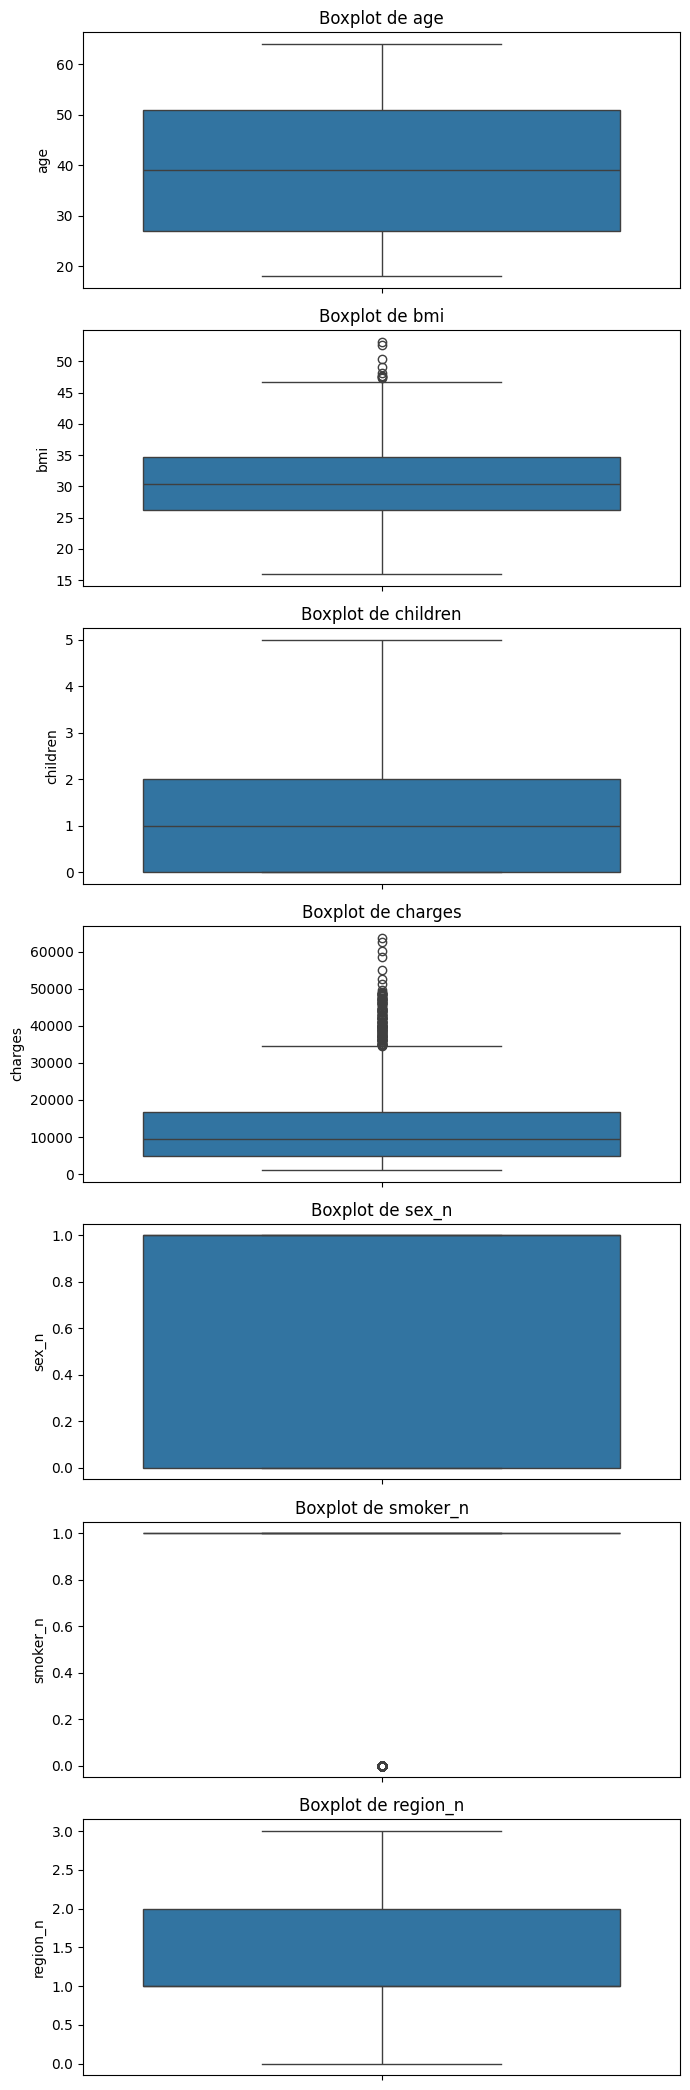

In [44]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)

Podemos determinar fácilmente que las variables afectadas por outliers son `bmi`, `charges` y `smoker_n`

#### Separación del Dataset en uno con outliers y otro sin outliers

In [45]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['bmi', 'charges', 'smoker_n']: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)],
 'charges': [0, np.float64(34524.777625)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)]}

#### Análisis de valores faltantes

In [46]:
data_limpia_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [47]:
data_limpia_sin_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

### IMPORTANTE

En este caso no encontramos valores faltantes en ninguno de los dos data set (data_limpia_con_outliers, data_limpia_sin_outliers), si no fuese este el caso, y tuviesemos que lidiar con ellos lo hariamos de la siguiente manera.  

total_data["Age"].fillna(total_data["Age"].median(), inplace = True)

total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True) # RECORDANDO QUE MODE PARA LAS VARIABLES CATEGORICAS

total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True) # Y MEDIA PARA LAS VARIABLES NUMERICAS

total_data.isnull().sum()

#### Inferencia de nuevas características

### IMPORTANTE

En este caso no es necesaria la inferencia de nuevas caracteristicas. Si lo fuese se haria de la siguiente manera:

In [ ]:
# # Esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes.

# # IMPORTANTE TENER EN CUENTA EL RESULTADO DE LA COLUMNA A ESPERAR PARA SABER SI COMO TRATAR LA FUSION(si por ejemplo con una simple suma, un |(or) o como en este caso convertir las columnas a int)

# # Convertir las columnas a 0 o 1, tratando los valores mayores que 0.0 como 1.
# data_limpia_con_outliers["client_with_loan"] = ((data_limpia_con_outliers["housing_n"] > 0).astype(int) | (data_limpia_con_outliers["loan_n"] > 0.0).astype(int))

# data_limpia_sin_outliers["client_with_loan"] = ((data_limpia_sin_outliers["housing_n"] > 0).astype(int) | (data_limpia_sin_outliers["loan_n"] > 0.0).astype(int))


# data_limpia_sin_outliers.head()

#### Escalado de valores

In [49]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'] # Aqui van las variables numericas. 

# Dividimos el conjunto de datos en muestras de train y test

X_con_outliers = data_limpia_con_outliers.drop("charges", axis = 1)[num_variables] # IMPORTANTE CAMBIAR EL TARGET!!!!
X_sin_outliers = data_limpia_sin_outliers.drop("charges", axis = 1)[num_variables] # IMPORTANTE CAMBIAR EL TARGET!!!!
y = data_limpia_con_outliers["charges"] # IMPORTANTE CAMBIAR EL TARGET!!!!

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/y_train.xlsx", index = False)
y_test.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,23,24.510,0,1,1,3
968,21,25.745,2,1,1,3
599,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


##### Normalización

In [50]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'] # Aqui van las variables numericas. 

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/models(norm_scal)/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/models(norm_scal)/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,-1.157680,-0.996928,-0.907908,0.971409,0.500292,1.383946
968,-1.300619,-0.792762,0.766904,0.971409,0.500292,1.383946
599,0.914926,1.154664,0.766904,-1.029432,0.500292,0.477983
170,1.701087,1.806837,-0.907908,0.971409,0.500292,-0.427981
275,0.557580,-0.651417,0.766904,-1.029432,0.500292,1.383946


##### Escalado Mínimo-Máximo

In [51]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'] # Aqui van las variables numericas. 

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/models(norm_scal)/scaler_con_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_con_outliers, file)
  
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/models(norm_scal)/scaler_sin_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/processed/data_(excels)/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,0.108696,0.230024,0.0,1.0,1.0,1.000000
968,0.065217,0.263250,0.4,1.0,1.0,1.000000
599,0.739130,0.580172,0.4,0.0,1.0,0.666667
170,0.978261,0.686306,0.0,1.0,1.0,0.333333
275,0.630435,0.286252,0.4,0.0,1.0,1.000000
